In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pdpf

In [79]:
path= '../tableau_project.csv'
df = pd.read_csv(path, index_col= 'Unnamed: 0')

In [80]:
df.head()

,journey_id,vehicle_type_id,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,...,price_distance,price_duration,distance,duration,source,rider_waiting_time,driver_waiting_time,price_supplements,discount,rating
0,93e6d216088af74c32183283d4bb2953,077866c3fd1a75f51ca7f8eae166ae32,asap,2017-12-16 11:08:59,19.431363,-99.195362,2017-12-16 11:37:32,19.406438,-99.175260,drop off,...,"5,204",0,"7,943","1,058",Android,590,48,662,0,9.0
1,444b084ec64244919afadfba879876a3,077866c3fd1a75f51ca7f8eae166ae32,asap,2017-12-16 11:06:16,19.431567,-99.195368,2017-12-16 11:07:21,NaN,NaN,rider cancel,...,0,0,0,0,iPhone,NaN,NaN,0,0,9.0
2,dbcc57f4e7606a71c74c6e4666a977a4,077866c3fd1a75f51ca7f8eae166ae32,asap,2017-11-24 22:58:37,19.422052,-99.174499,2017-11-24 23:27:05,19.438666,-99.180821,drop off,...,"3,552",0,"3,054",689,Android,923,4,0,0,10.0
3,1ffe9a24033847148c683574985df56c,077866c3fd1a75f51ca7f8eae166ae32,asap,2017-12-16 09:17:08,19.433119,-99.154844,2017-12-16 09:17:30,19.290148,-99.144407,rider cancel,...,0,0,0,0,iPhone,NaN,NaN,0,0,9.0
4,fb1ef7d070724482a33be41f27737ea5,077866c3fd1a75f51ca7f8eae166ae32,asap,2017-11-24 18:11:00,19.440996,-99.183581,2017-11-24 18:31:31,19.422815,-99.174865,drop off,...,"2,974",12,"2,859",887,iPhone,329,36,0,0,8.0


In [61]:
df.describe()

,start_lat,start_lon,end_lat,end_lon,rating
count,3864.000000,3864.000000,3807.000000,3807.000000,3864.000000
mean,19.412159,-99.195443,19.410835,-99.197221,8.289596
std,0.028146,0.040832,0.030001,0.044896,1.265744
min,19.290513,-99.288274,19.196463,-99.655665,4.000000
25%,19.405320,-99.207814,19.379486,-99.253980,8.000000
50%,19.422749,-99.175834,19.422749,-99.178435,9.000000
75%,19.426613,-99.170483,19.429759,-99.171955,9.000000
max,19.513544,-99.051114,19.517451,-99.048817,10.000000


In [57]:
report = pdpf.ProfileReport(df)
report

Number of variables,22
Number of observations,3807
Total Missing (%),5.3%
Total size in memory,654.4 KiB
Average record size in memory,176.0 B
Numeric,6
Categorical,14
Boolean,0
Date,0
Text (Unique),2
Rejected,0


In [62]:
null_cols = df.isnull().sum()
null_cols[null_cols > 0]

end_lat                  57
end_lon                  57
price                    20
price_distance         1052
price_duration         1052
distance                 20
duration                 20
rider_waiting_time     1131
driver_waiting_time    1179
discount                 20
dtype: int64

In [63]:
df_lat_null= df[(df['end_lat'].isnull() == True) & (df['end_lon'].isnull() == True)]
df_lat_null.head()

,journey_id,vehicle_type_id,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,...,price_distance,price_duration,distance,duration,source,rider_waiting_time,driver_waiting_time,price_supplements,discount,rating
1,444b084ec64244919afadfba879876a3,077866c3fd1a75f51ca7f8eae166ae32,asap,2017-12-16 11:06:16,19.431567,-99.195368,2017-12-16 11:07:21,NaN,NaN,rider cancel,...,0,0,0,0,iPhone,NaN,NaN,0,0,9.0
152,06d047e15cc94727b5a5098296a2d97c,21620ea5749f2e0679a8c72c7fbafb9e,asap,2017-11-14 05:18:19,19.431498,-99.187064,2017-11-14 05:18:48,NaN,NaN,rider cancel,...,NaN,NaN,0,0,iPhone,NaN,NaN,0,0,8.0
492,a823ec9b95c4fd26fc6874d0ed88fce3,21620ea5749f2e0679a8c72c7fbafb9e,asap,2017-11-11 03:27:38,19.433270,-99.173481,2017-11-11 03:52:14,NaN,NaN,drop off,...,"5,088",0,"4,744","1,331",web,126,133,0,0,10.0
750,83156327e7914db3a4caa04df1f7f1bf,21620ea5749f2e0679a8c72c7fbafb9e,asap,2017-05-17 17:33:57,19.390412,-99.185959,2017-05-17 17:58:29,NaN,NaN,drop off,...,"6,120",0,"5,079","1,081",iPhone,369,20,0,0,6.0
946,353db845c02c40e1bcd5072ab0bbb945,21620ea5749f2e0679a8c72c7fbafb9e,asap,2017-06-09 22:34:48,19.438234,-99.201190,2017-06-09 22:34:59,NaN,NaN,rider cancel,...,NaN,NaN,0,0,iPhone,NaN,NaN,0,0,6.0


/home/miguel/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/miguel/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


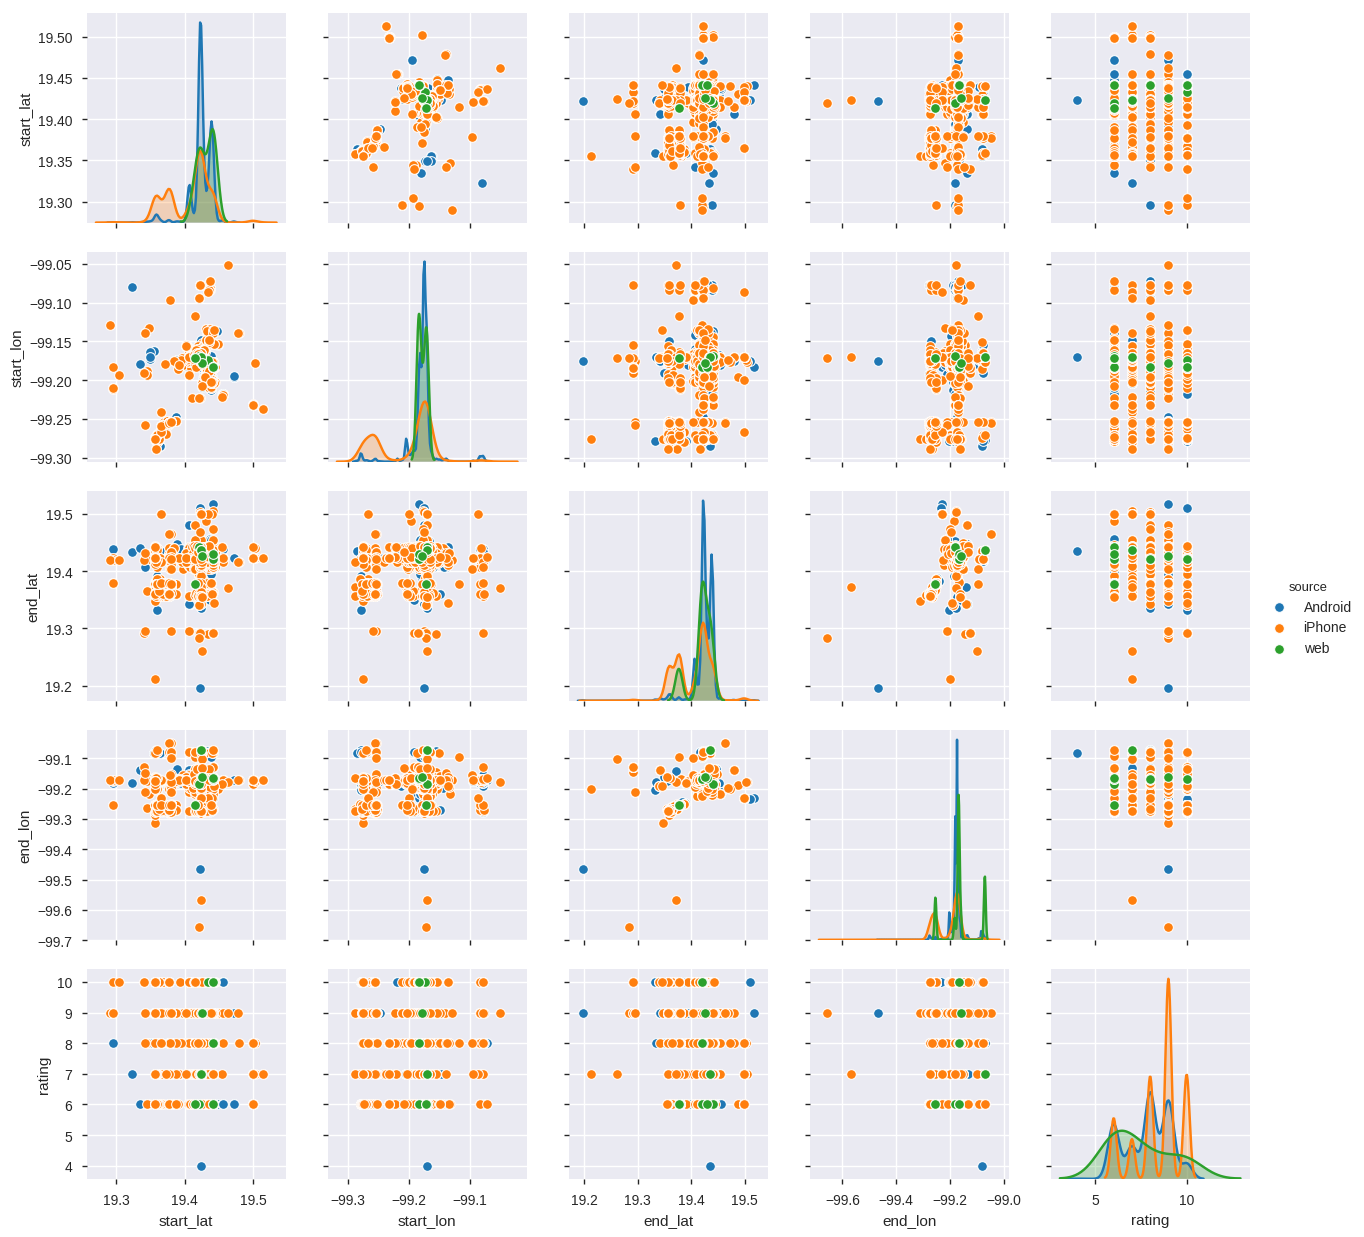

In [66]:
sns.pairplot(df , hue='source')

In [44]:
#Eliminar los recorridos sin finalizar para pintar lat, long.
df_est_latit = df.drop(df_lat_null.index)

In [81]:
df.dtypes

journey_id              object
vehicle_type_id         object
start_type              object
start_at                object
start_lat              float64
start_lon              float64
end_at                  object
end_lat                float64
end_lon                float64
end_state               object
price                   object
price_distance          object
price_duration          object
distance                object
duration                object
source                  object
rider_waiting_time      object
driver_waiting_time     object
price_supplements       object
discount                object
rating                 float64
dtype: object

In [84]:
to_float_columns= ['price', 'price_distance', 'price_duration', 'price_supplements']

def convert_to_float(list_cols):
    for col in list_cols:
        print (col)
        df[list_cols] = df[list_cols].str.replace(',', '.')
        df[list_cols] = df[list_cols].astype('float64')
    

In [85]:
#todo. Los putos nan
convert_to_float(to_float_columns)

price


AttributeError: 'DataFrame' object has no attribute 'str'

In [74]:
df.dtypes

journey_id              object
vehicle_type_id         object
start_type              object
start_at                object
start_lat              float64
start_lon              float64
end_at                  object
end_lat                float64
end_lon                float64
end_state               object
price                  float64
price_distance          object
price_duration          object
distance                object
duration                object
source                  object
rider_waiting_time      object
driver_waiting_time     object
price_supplements       object
discount                object
rating                 float64
dtype: object

In [75]:
df.head()

,journey_id,vehicle_type_id,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,...,price_distance,price_duration,distance,duration,source,rider_waiting_time,driver_waiting_time,price_supplements,discount,rating
0,93e6d216088af74c32183283d4bb2953,077866c3fd1a75f51ca7f8eae166ae32,asap,2017-12-16 11:08:59,19.431363,-99.195362,2017-12-16 11:37:32,19.406438,-99.175260,drop off,...,"5,204",0,"7,943","1,058",Android,590,48,662,0,9.0
1,444b084ec64244919afadfba879876a3,077866c3fd1a75f51ca7f8eae166ae32,asap,2017-12-16 11:06:16,19.431567,-99.195368,2017-12-16 11:07:21,NaN,NaN,rider cancel,...,0,0,0,0,iPhone,NaN,NaN,0,0,9.0
2,dbcc57f4e7606a71c74c6e4666a977a4,077866c3fd1a75f51ca7f8eae166ae32,asap,2017-11-24 22:58:37,19.422052,-99.174499,2017-11-24 23:27:05,19.438666,-99.180821,drop off,...,"3,552",0,"3,054",689,Android,923,4,0,0,10.0
3,1ffe9a24033847148c683574985df56c,077866c3fd1a75f51ca7f8eae166ae32,asap,2017-12-16 09:17:08,19.433119,-99.154844,2017-12-16 09:17:30,19.290148,-99.144407,rider cancel,...,0,0,0,0,iPhone,NaN,NaN,0,0,9.0
4,fb1ef7d070724482a33be41f27737ea5,077866c3fd1a75f51ca7f8eae166ae32,asap,2017-11-24 18:11:00,19.440996,-99.183581,2017-11-24 18:31:31,19.422815,-99.174865,drop off,...,"2,974",12,"2,859",887,iPhone,329,36,0,0,8.0
